In [88]:
# Importing Data Exploration Libraries
import pandas as pd
import numpy as np

# Importing Data Visualisation Libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#for random forest
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

#for SVM
from sklearn import svm


In [2]:
# Reading the file
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
type(df.iloc[10])

pandas.core.series.Series

In [4]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [5]:
df.isnull().sum()
# This dataset has no null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
# Assigning numeric values to strings
salaries = { 'low' : 1, 'medium' : 2, 'high' : 3}
df.salary = [salaries[i] for i in df.salary]

In [7]:
# Assigning numeric values to strings
dept = { 'sales':1,
       'technical':2,
       'support':3,
       'IT':4,
       'product_mng':5,
       'marketing':6,
       'RandD':7,
       'accounting':8,
       'hr':9,
       'management':10}
df.Department = [dept[i] for i in df.Department]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [8]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.739237,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.555587,1.414730


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.695513,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.754845,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


0    11428
1     3571
Name: left, dtype: int64


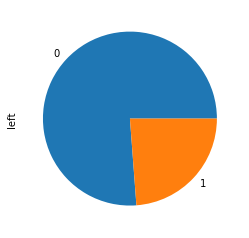

In [10]:
print(df["left"].value_counts())
# 3571 people left the company, denoted by 1
df["left"].value_counts().plot.pie()

In [11]:
df["salary"].value_counts()
# People having low, medium and high income

1    7316
2    6446
3    1237
Name: salary, dtype: int64

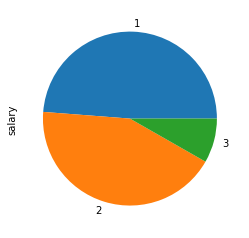

In [12]:
df["salary"].value_counts().plot.pie()
# This shows the distribution of people having various salaries

In [13]:
# Drop the columns not required 
df_new = df.drop(columns=['Department','last_evaluation'])
df_new.sample()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
1670,0.44,2,141,3,0,1,0,2


# Logistic Regression
## Separating training and testing data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_new[['salary','promotion_last_5years','average_montly_hours','satisfaction_level','Work_accident']],df.left,train_size=0.3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
# X_test

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_predicted = model.predict(X_test)

In [19]:
model.score(X_test,y_test)

0.7826666666666666

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7989
           1       0.61      0.26      0.36      2511

   micro avg       0.78      0.78      0.78     10500
   macro avg       0.70      0.60      0.62     10500
weighted avg       0.76      0.78      0.75     10500



In [21]:
var1 = df[['satisfaction_level','average_montly_hours']].as_matrix()
var2 = df['left']
# type_label = np.where(df['left']=='left', 0, 1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


# Random Forest

In [22]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.695513,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.754845,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [23]:
train, test = df[df["is_train"]== True], df[df['is_train']==False]
print('The training data:',len(train))
print('The testing data:',len(test))

The training data: 11283
The testing data: 3716


In [24]:
y = pd.factorize(train['left'])[0]
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
dfnew = df.copy()
dfnew = dfnew.drop(['left', 'is_train'], axis=1)
dfnew.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,1,2
2,0.11,0.88,7,272,4,0,0,1,2
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [64]:
features = dfnew.columns[:]
features

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [65]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features],y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
y2 = pd.factorize(test['left'])[0]
i = y2.reshape(-1, 1)
i

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [67]:
ypred = clf.predict(test[features])
u = ypred.reshape(-1, 1)
u

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [68]:
from sklearn import metrics
print(metrics.classification_report(ypred, y2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       864
           1       1.00      0.99      0.99      2852

   micro avg       0.99      0.99      0.99      3716
   macro avg       0.98      0.99      0.98      3716
weighted avg       0.99      0.99      0.99      3716



# Creating the Confusion Matrix

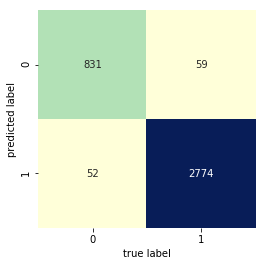

In [38]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, ypred)
sns.heatmap(mat.T, cmap="YlGnBu" ,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [85]:
feature_scores = clf.feature_importances_*100
feature_scores

array([37.5466053 , 10.18205466, 16.29151446, 12.46049986, 20.7734706 ,
        0.50528322,  0.12607242,  1.25705122,  0.85744827])

In [81]:
list_imp = list(zip(feature_scores, features))

In [86]:
df_imp = pd.DataFrame(list_imp, columns = ['Featue Scores', 'Name of features'])
df_imp

,Featue Scores,Name of features
0,37.546605,satisfaction_level
1,10.182055,last_evaluation
2,16.291514,number_project
3,12.460500,average_montly_hours
4,20.773471,time_spend_company
5,0.505283,Work_accident
6,0.126072,promotion_last_5years
7,1.257051,Department
8,0.857448,salary


## Therefore we see that the most important factor that affects attrition rate is satisfaction level of the employees and the time they have spent in the company